In [1]:
import pandas as pd
import yfinance as yahoo
import datetime as dt
import numpy as np

start = dt.datetime(2019,1,1)
end = dt.datetime.today()

In [2]:
data = yahoo.download(tickers="BMA BMA.BA CEPU CEPU.BA  CRESY CRES.BA "
                              "EDN EDN.BA GGAL GGAL.BA IRS IRSA.BA LOMA LOMA.BA PAM"
                              " PAMP.BA SUPV SUPV.BA TEO TECO2.BA TGS TGSU2.BA YPF YPFD.BA ARS=X",start = start, end = end)['Adj Close']

data = data.rename(columns={'BMA.BA':'BMABA', 'CEPU.BA':'CEPUBA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

data = data.fillna(method='ffill')

[*********************100%***********************]  25 of 25 completed


In [3]:
cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)
c = cable.T
cable['MIN'] = c.min()
cable['MAX'] = c.max()
cable['Rango'] = (cable.MAX / cable.MIN) - 1  #create an spectre interval of opportunities gap to arbitrage
cable['USDARS'] = data.USDARS

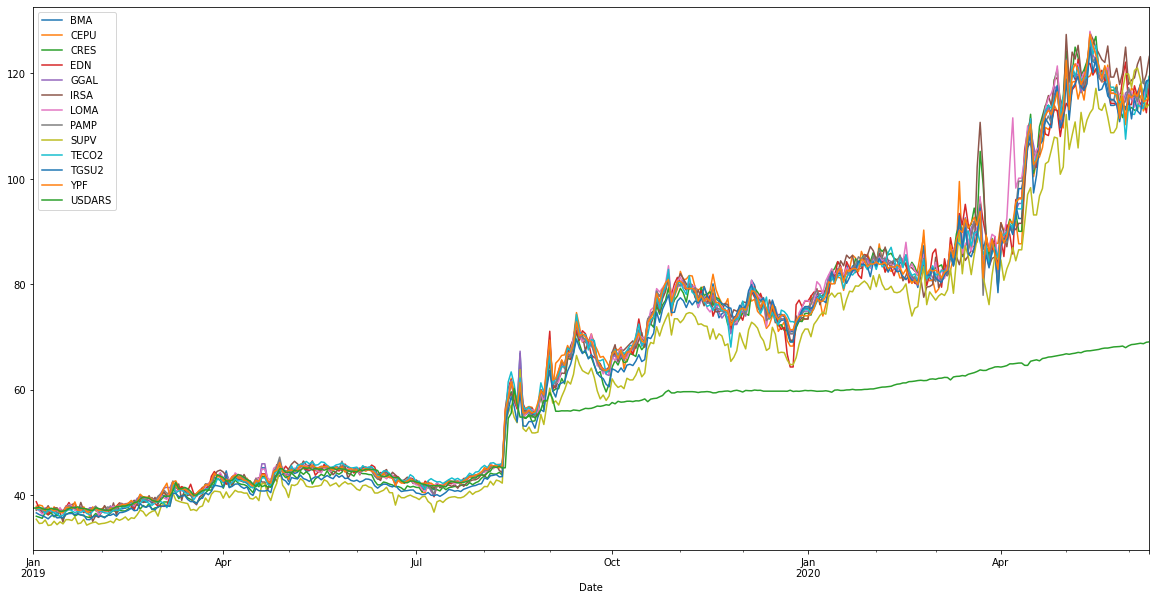

In [4]:
acciones = cable.iloc[:,:12]
acciones['USDARS'] = cable.USDARS
acciones.plot(figsize=(20,10))

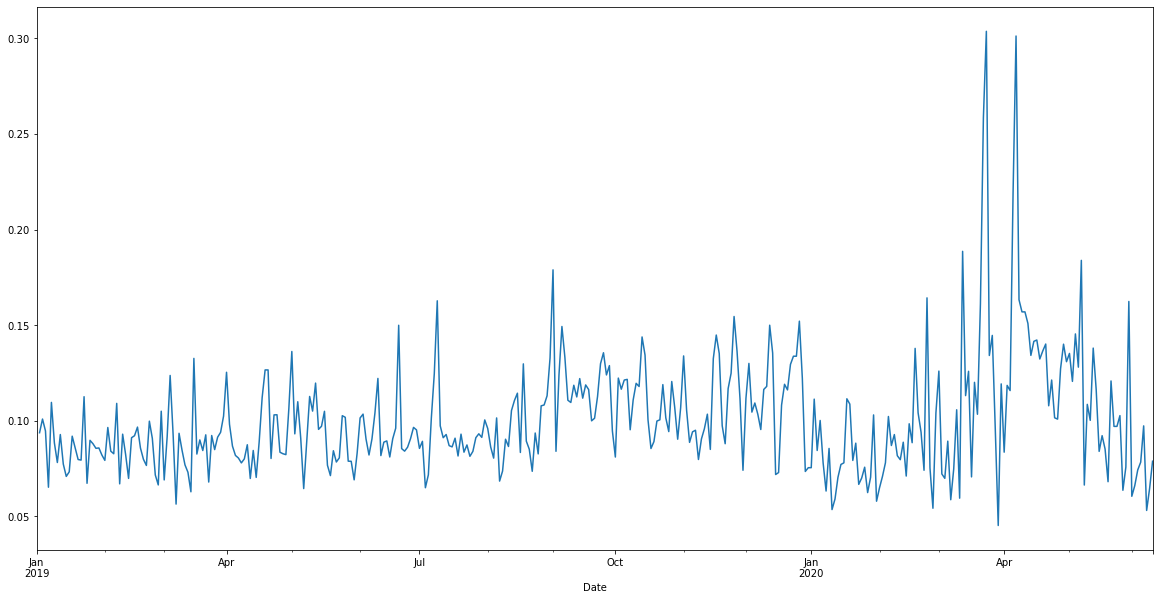

In [5]:
cable.Rango.plot(figsize=(20,10))

In [6]:
# 1 RUEDA INTRADIARIA
merval = yahoo.download(tickers="BMA.BA	CEPU.BA	CRES.BA	EDN.BA	GGAL.BA	IRSA.BA	LOMA.BA	PAMP.BA	SUPV.BA	TECO2.BA TGSU2.BA YPFD.BA", period="1d", interval = "1m")['Adj Close']


adr = yahoo.download(tickers="BMA CEPU CRESY EDN GGAL IRS LOMA PAM SUPV TEO TGS YPF", period= "1d", interval = "1m")['Adj Close']

merval = pd.DataFrame(data=merval)

merval = merval.rename(columns={'BMA.BA': 'BMABA', 'CEPU.BA': 'CEPUBA', 'CRES.BA': 'CRESBA',	'EDN.BA': 'EDNBA',
                                'GGAL.BA': 'GGALBA', 'IRSA.BA': 'IRSABA',	'LOMA.BA': 'LOMABA', 'PAMP.BA': 'PAMPBA',
                                'SUPV.BA': 'SUPVBA', 'TECO2.BA': 'TECO2BA', 'TGSU2.BA': 'TGSU2BA', 'YPFD.BA': 'YPFDBA'})

merval = merval.fillna(method='ffill')
adr = adr.fillna(method='ffill')


[*********************100%***********************]  12 of 12 completed
[*********************100%***********************]  12 of 12 completed


In [7]:
merval = merval.iloc[:300,:]

adr = pd.DataFrame(data=adr)

adr = adr.iloc[90:,:]

intraday = pd.DataFrame(data=None)
intraday['BMA'] = (merval.BMABA / adr.BMA) * 10
intraday['CEPU'] = (merval.CEPUBA / adr.CEPU) * 10
intraday['CRES'] = (merval.CRESBA / adr.CRESY) * 10
intraday['EDN'] = (merval.EDNBA / adr.EDN) * 20
intraday['GGAL'] = (merval.GGALBA / adr.GGAL) * 10
intraday['IRSA'] = (merval.IRSABA / adr.IRS) * 10
intraday['LOMA'] = (merval.LOMABA / adr.LOMA) * 5
intraday['PAMP'] = (merval.PAMPBA / adr.PAM) * 25
intraday['SUPV'] = (merval.SUPVBA / adr.SUPV) * 5
intraday['TECO2'] = (merval.TECO2BA / adr.TEO) * 5
intraday['TGSU2'] = (merval.TGSU2BA / adr.TGS) * 5
intraday['YPF'] = (merval.YPFDBA / adr.YPF)
i = intraday.T
intraday['MIN'] = i.min()
intraday['MAX'] = i.max()
intraday['Range'] = (i.max() / i.min()) - 1  # create an spectre interval of opportunities gap to arbitrage

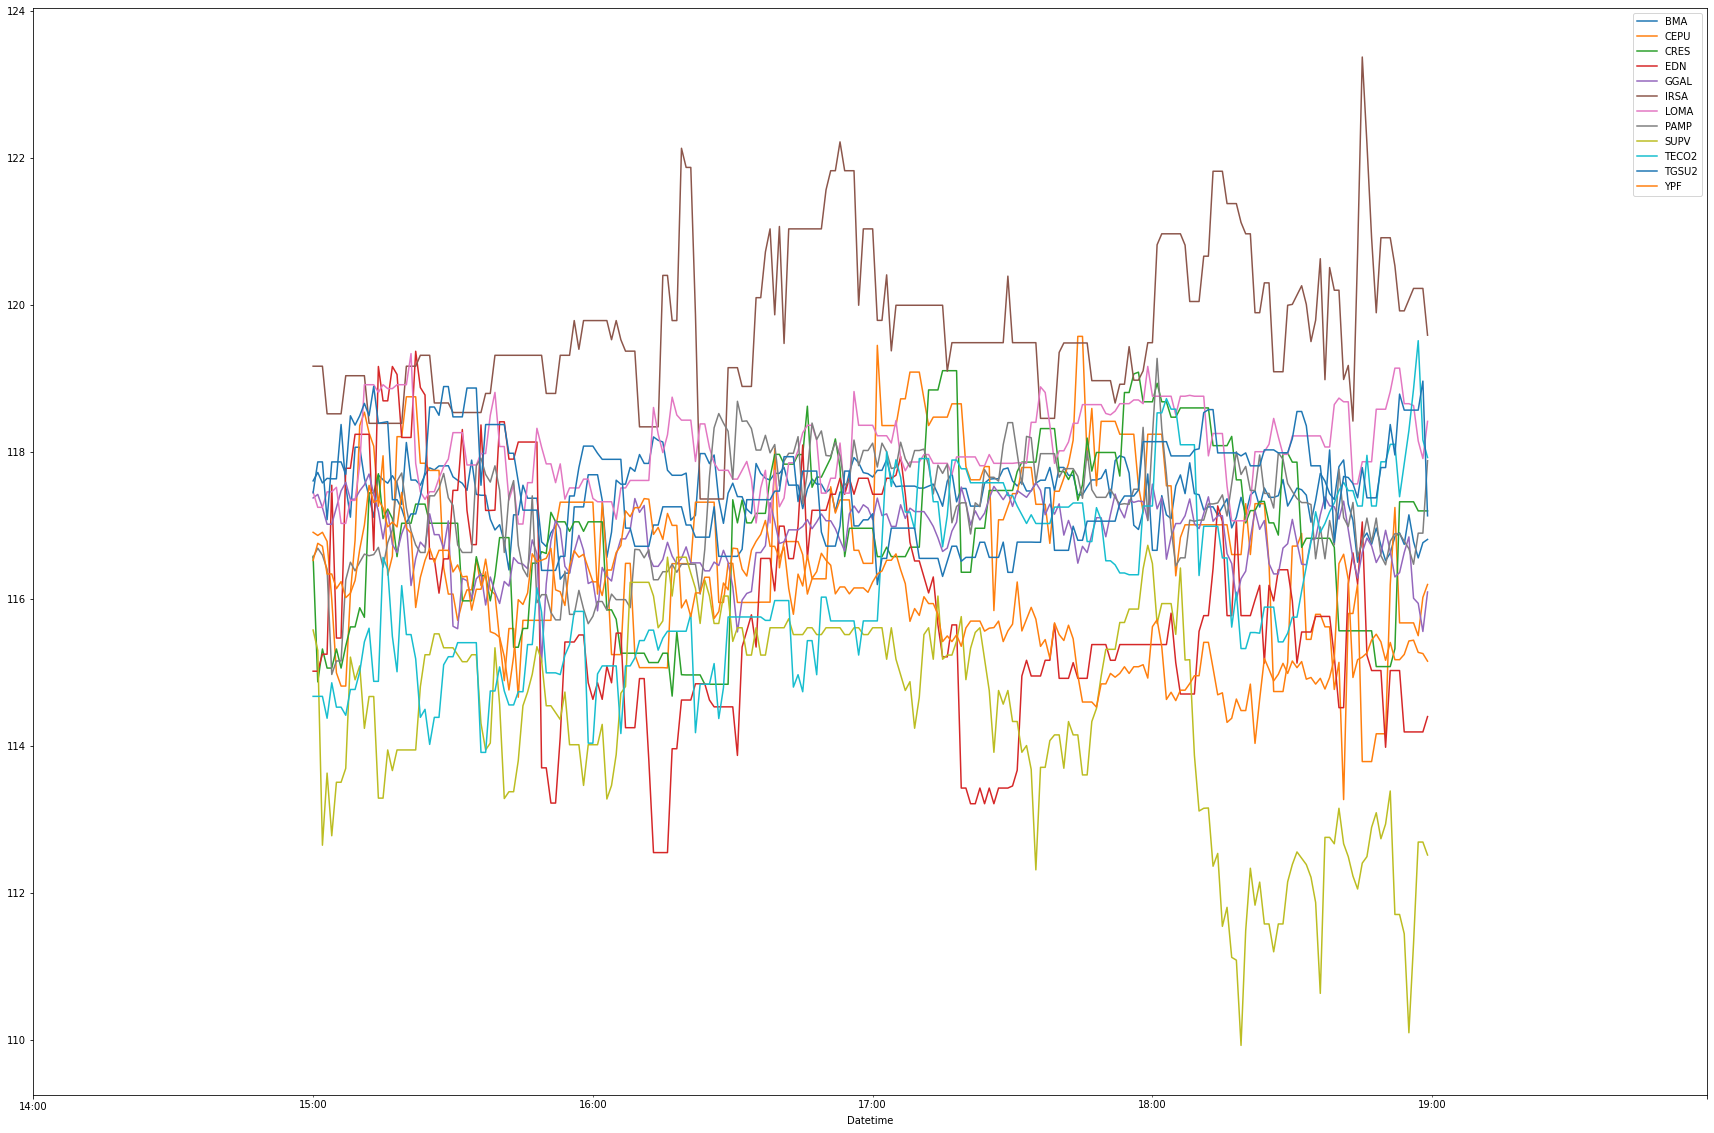

In [8]:
intradiario = intraday.iloc[:,:12]
intradiario.plot(figsize=(30,20))

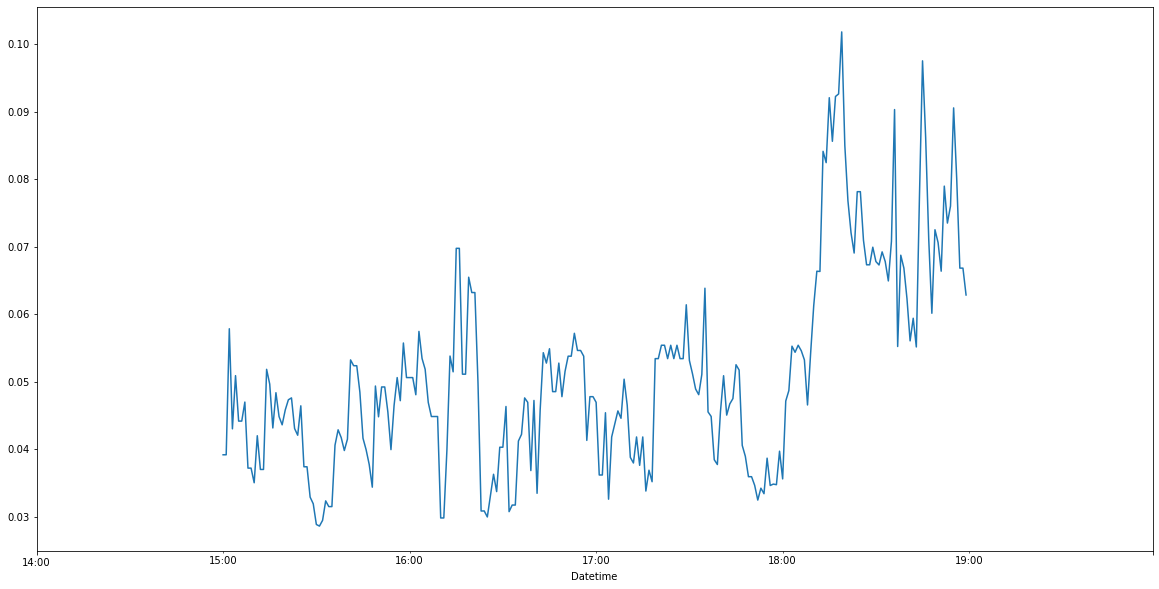

In [9]:
intraday.Range.plot(figsize=(20,10))

In [10]:
adr = pd.read_csv('adr4mayo.csv')
merval = pd.read_csv('merval4mayo.csv')

In [11]:
intraday = pd.DataFrame(data=None)
intraday['BMA'] = (merval.BMABA / adr.BMA) * 10
intraday['CEPU'] = (merval.CEPUBA / adr.CEPU) * 10
intraday['CRES'] = (merval.CRESBA / adr.CRESY) * 10
intraday['EDN'] = (merval.EDNBA / adr.EDN) * 20
intraday['GGAL'] = (merval.GGALBA / adr.GGAL) * 10
intraday['IRSA'] = (merval.IRSABA / adr.IRS) * 10
intraday['LOMA'] = (merval.LOMABA / adr.LOMA) * 5
intraday['PAMP'] = (merval.PAMPBA / adr.PAM) * 25
intraday['SUPV'] = (merval.SUPVBA / adr.SUPV) * 5
intraday['TECO2'] = (merval.TECO2BA / adr.TEO) * 5
intraday['TGSU2'] = (merval.TGSU2BA / adr.TGS) * 5
intraday['YPF'] = (merval.YPFDBA / adr.YPF)
i = intraday.T


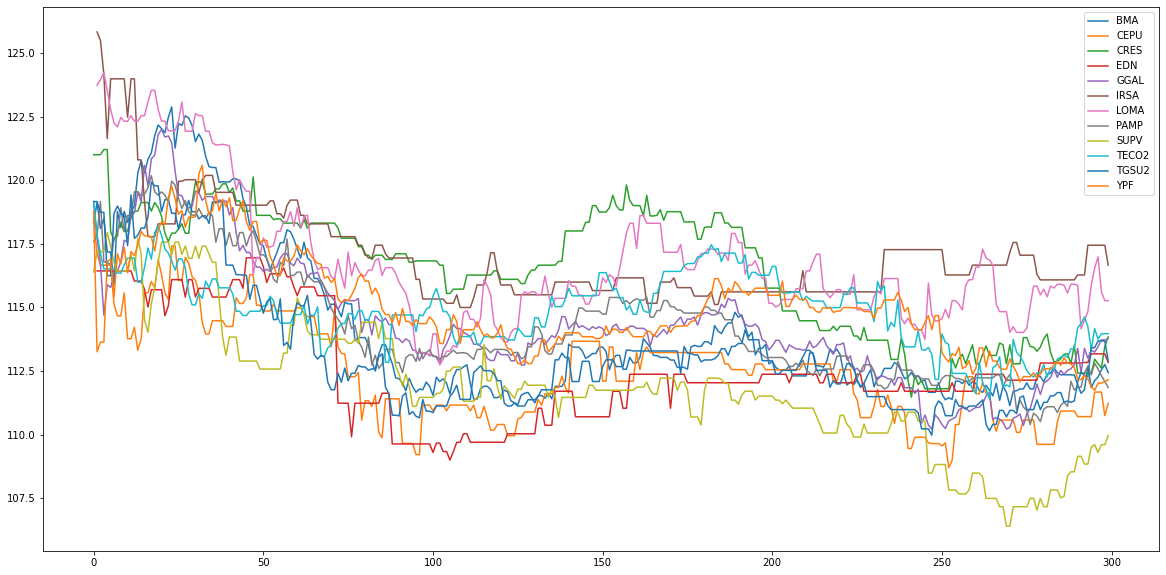

In [12]:
intraday.plot(figsize=(20,10))

In [13]:
intraday['MIN'] = i.min()
intraday['MAX'] = i.max()

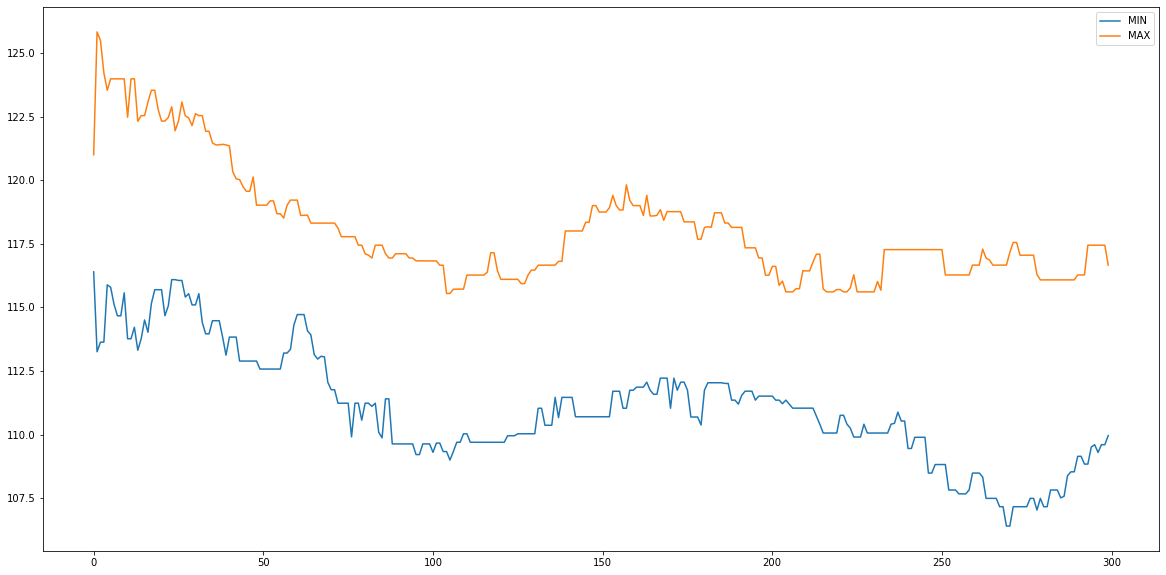

In [14]:
rango = intraday.iloc[:, 12:]
rango.plot(figsize=(20,10))

Date
2020-05-14    119.889163
2020-05-15    122.097030
2020-05-18    118.563756
2020-05-19    117.814160
2020-05-20    118.196035
2020-05-21    118.466433
2020-05-22    114.037035
2020-05-25    114.037035
2020-05-26    115.339166
2020-05-27    114.378117
2020-05-28    115.857943
2020-05-29    116.268915
2020-06-01    116.463595
2020-06-02    115.070144
2020-06-03    116.402458
2020-06-04    117.328007
2020-06-05    117.721599
2020-06-08    115.896479
2020-06-09    116.189772
2020-06-10    118.724682
Freq: B, Name: promedio, dtype: float64

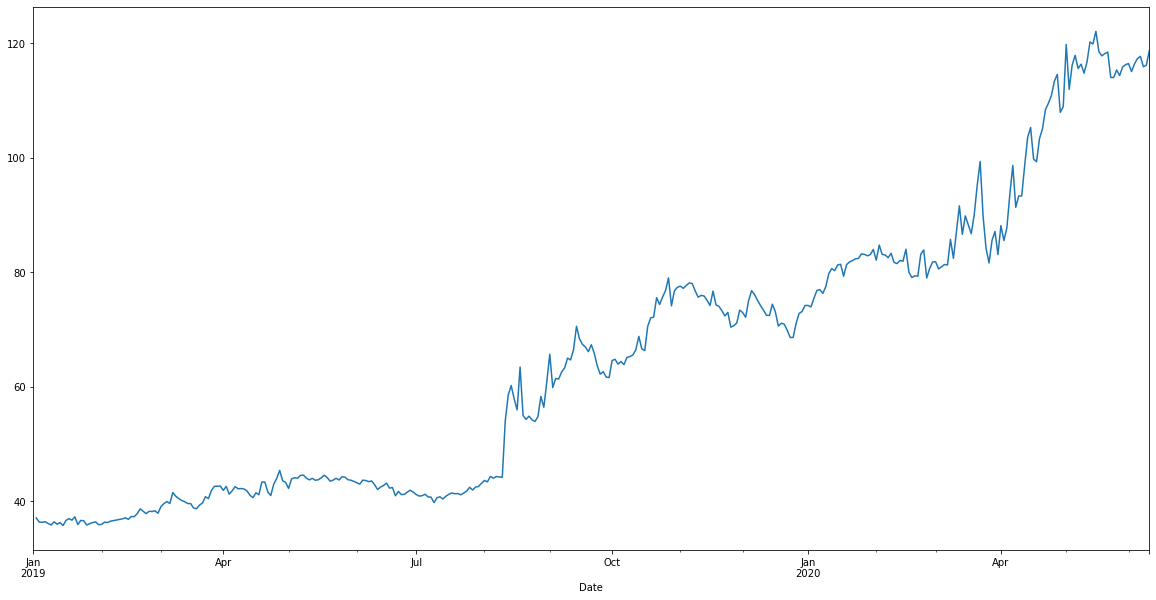

In [15]:
cable['promedio'] = (cable.MAX + cable.MIN) / 2
cable.promedio.plot(figsize=(20,10))
cable.promedio.tail(20)

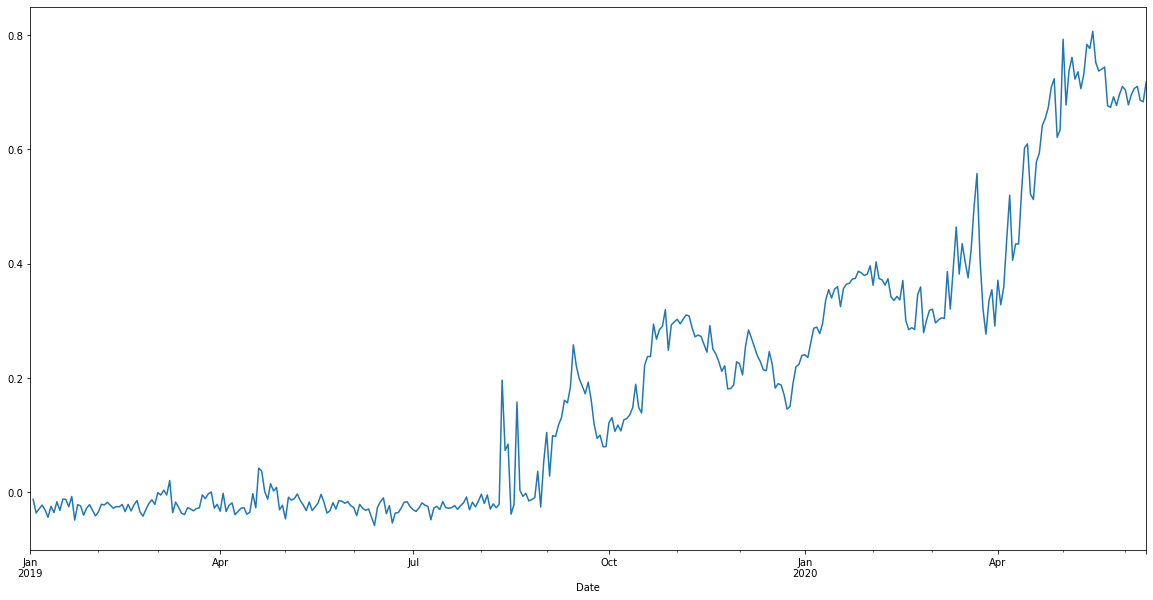

In [16]:
adr = (cable.MAX + cable.MIN) / 2
brecha = (adr / cable.USDARS)  - 1
brecha.plot(figsize=(20,10))

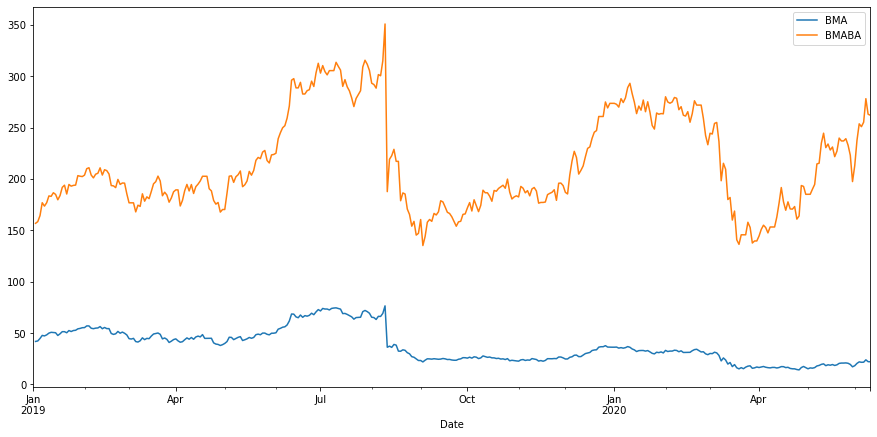

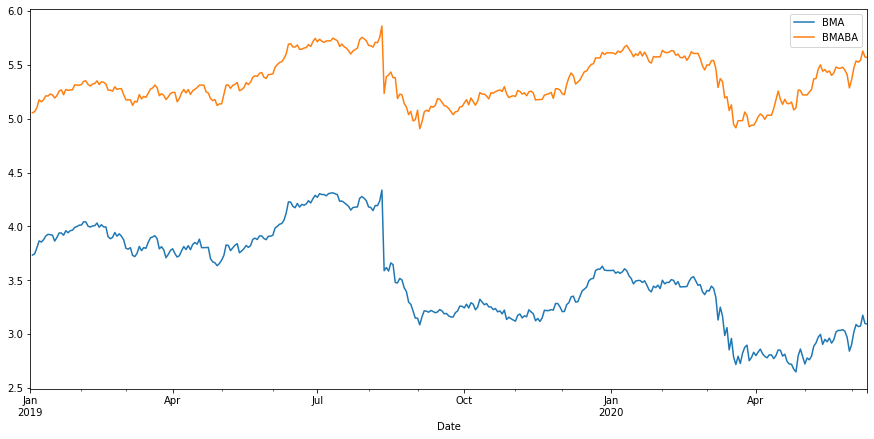

In [17]:
# data = dataset simple
macro = data.iloc[:,1:3]
macro_log = np.log(data.iloc[:,1:3])
macro.plot(figsize=(15,7))
macro_log.plot(figsize=(15,7))

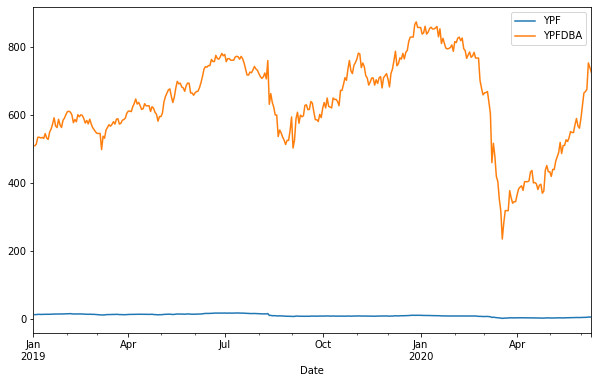

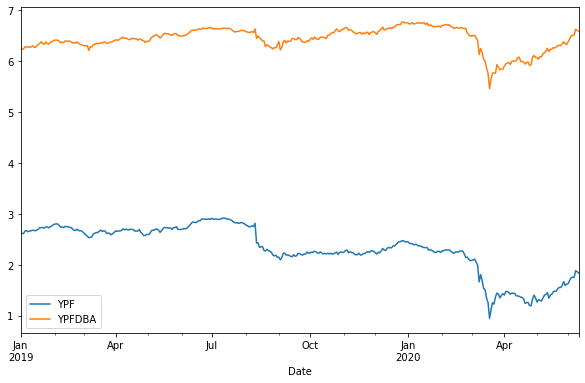

In [18]:
ypf = data.iloc[:,23:25].plot(figsize=(10,6))
ypf_log = np.log(data.iloc[:,23:25]).plot(figsize=(10,6))

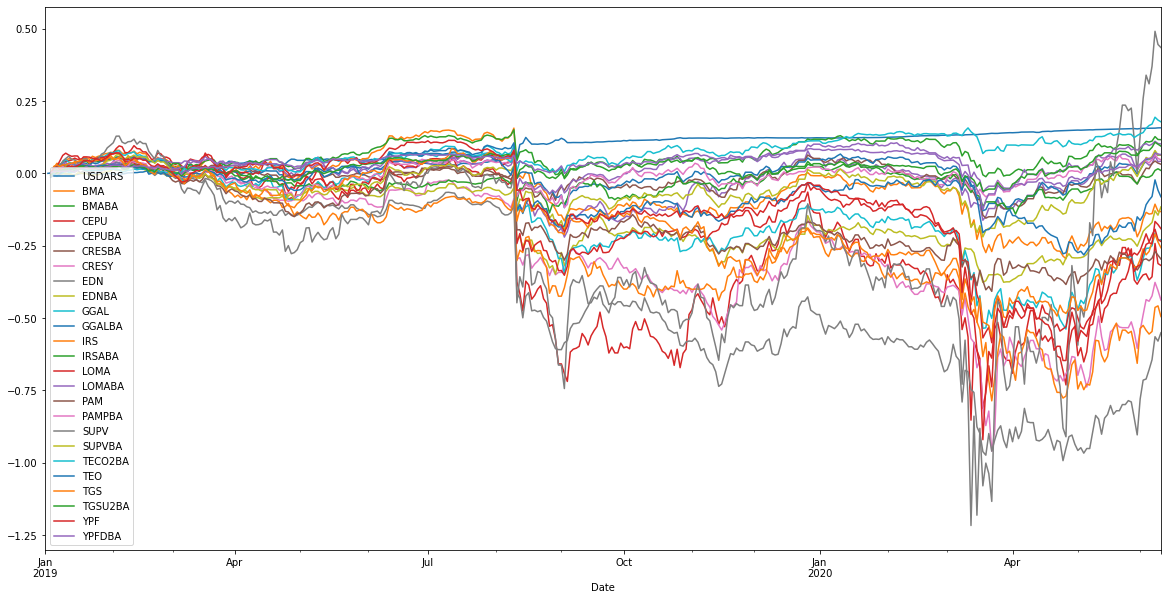

In [19]:
data_log = np.log(data)
data_log.pct_change().cumsum().plot(figsize=(20,10))

In [20]:
data = yahoo.download(tickers="BMA BMA.BA CEPU CEPU.BA  CRESY CRES.BA "
                              "EDN EDN.BA GGAL GGAL.BA IRS IRSA.BA LOMA LOMA.BA PAM"
                              " PAMP.BA SUPV SUPV.BA TEO TECO2.BA TGS TGSU2.BA YPF YPFD.BA ARS=X",start = start, end = end, interval="60m")['Adj Close']

data = data.rename(columns={'BMA.BA':'BMABA', 'CEPU.BA':'CEPUBA', 'CRES.BA': 'CRESBA', 'EDN.BA':'EDNBA',
                            'GGAL.BA':'GGALBA', 'IRSA.BA':'IRSABA', 'LOMA.BA':'LOMABA', 'PAMP.BA':'PAMPBA',
                            'SUPV.BA':'SUPVBA', 'TECO2.BA':'TECO2BA', 'TGSU2.BA':'TGSU2BA', 'YPFD.BA':'YPFDBA',
                            'ARS=X':'USDARS'})

data = data.fillna(method='ffill')

[*********************100%***********************]  25 of 25 completed


In [21]:
cable = pd.DataFrame(data=None)

cable['BMA'] = (data.BMABA / data.BMA) * 10
cable['CEPU'] = (data.CEPUBA / data.CEPU) * 10
cable['CRES'] = (data.CRESBA / data.CRESY) * 10
cable['EDN'] = (data.EDNBA / data.EDN) * 20
cable['GGAL'] = (data.GGALBA / data.GGAL) * 10
cable['IRSA'] = (data.IRSABA / data.IRS) * 10
cable['LOMA'] = (data.LOMABA / data.LOMA) * 5
cable['PAMP'] = (data.PAMPBA / data.PAM) * 25
cable['SUPV'] = (data.SUPVBA / data.SUPV) * 5
cable['TECO2'] = (data.TECO2BA / data.TEO) * 5
cable['TGSU2'] = (data.TGSU2BA / data.TGS) * 5
cable['YPF'] = (data.YPFDBA / data.YPF)
c = cable.T
cable['MIN'] = c.min()
cable['MAX'] = c.max()
cable['Rango'] = (cable.MAX / cable.MIN) - 1  #create an spectre interval of opportunities gap to arbitrage
cable['USDARS'] = data.USDARS

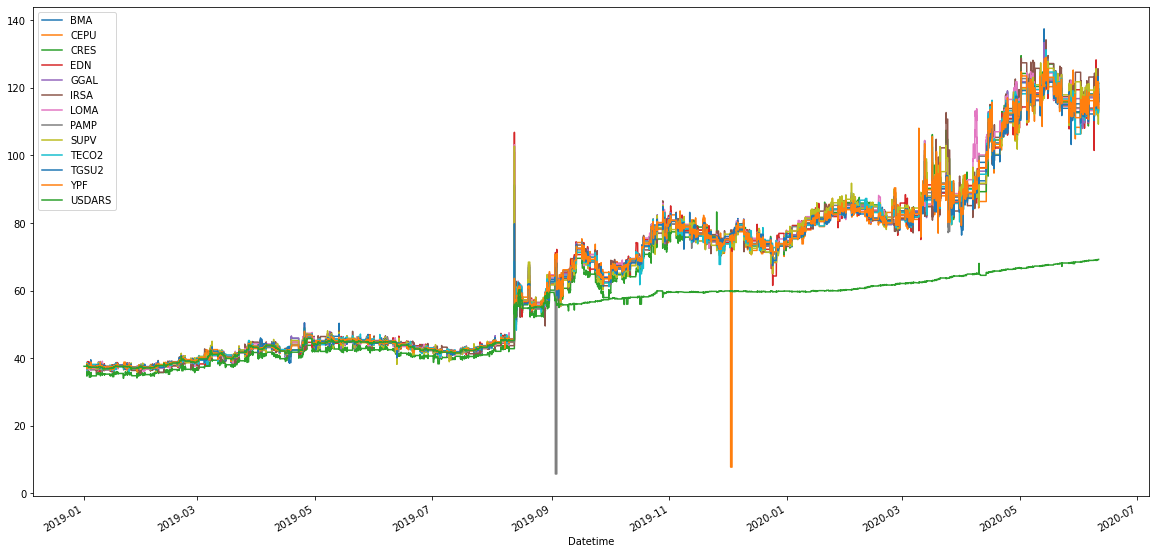

In [22]:
acciones = cable.iloc[:,:12]
acciones['USDARS'] = cable.USDARS
acciones.plot(figsize=(20,10))

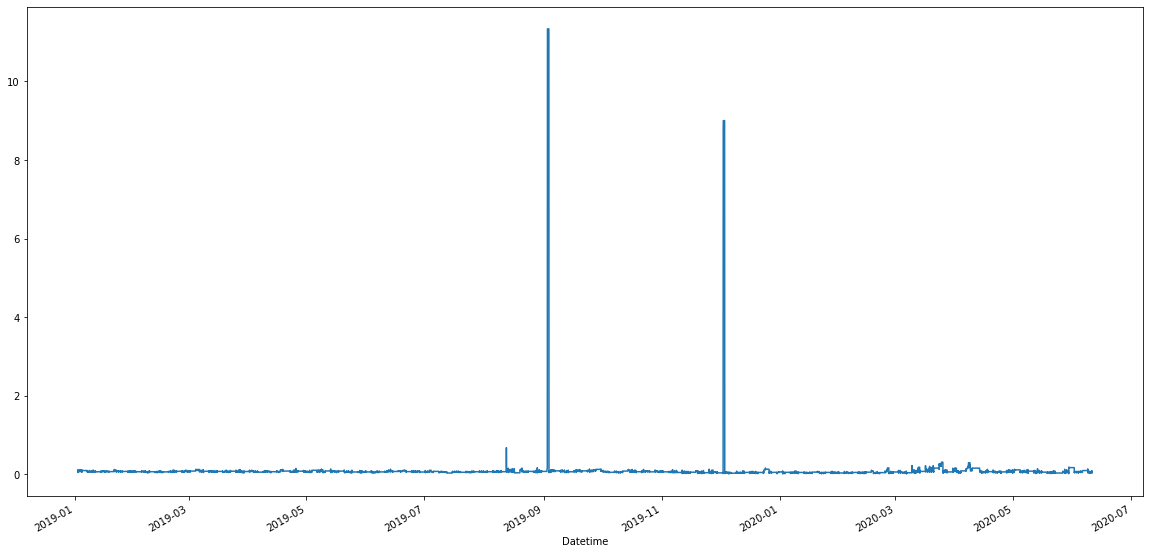

In [25]:
cable.Rango.plot(figsize=(20,10))